In [9]:
# Initial setup:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 1

#For fancy plots
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

# import libraries:
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
#path_git = git.Repo('.', search_parent_directories=True).working_tree_dir

from getdist import plots
import getdist
from getdist import plots, MCSamples, loadMCSamples
getdist.chains.print_load_details = False
import scipy
import numpy as np

from matplotlib import pyplot as plt
from scipy.linalg import sqrtm

from seaborn import heatmap
import pandas as pd
import emcee

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


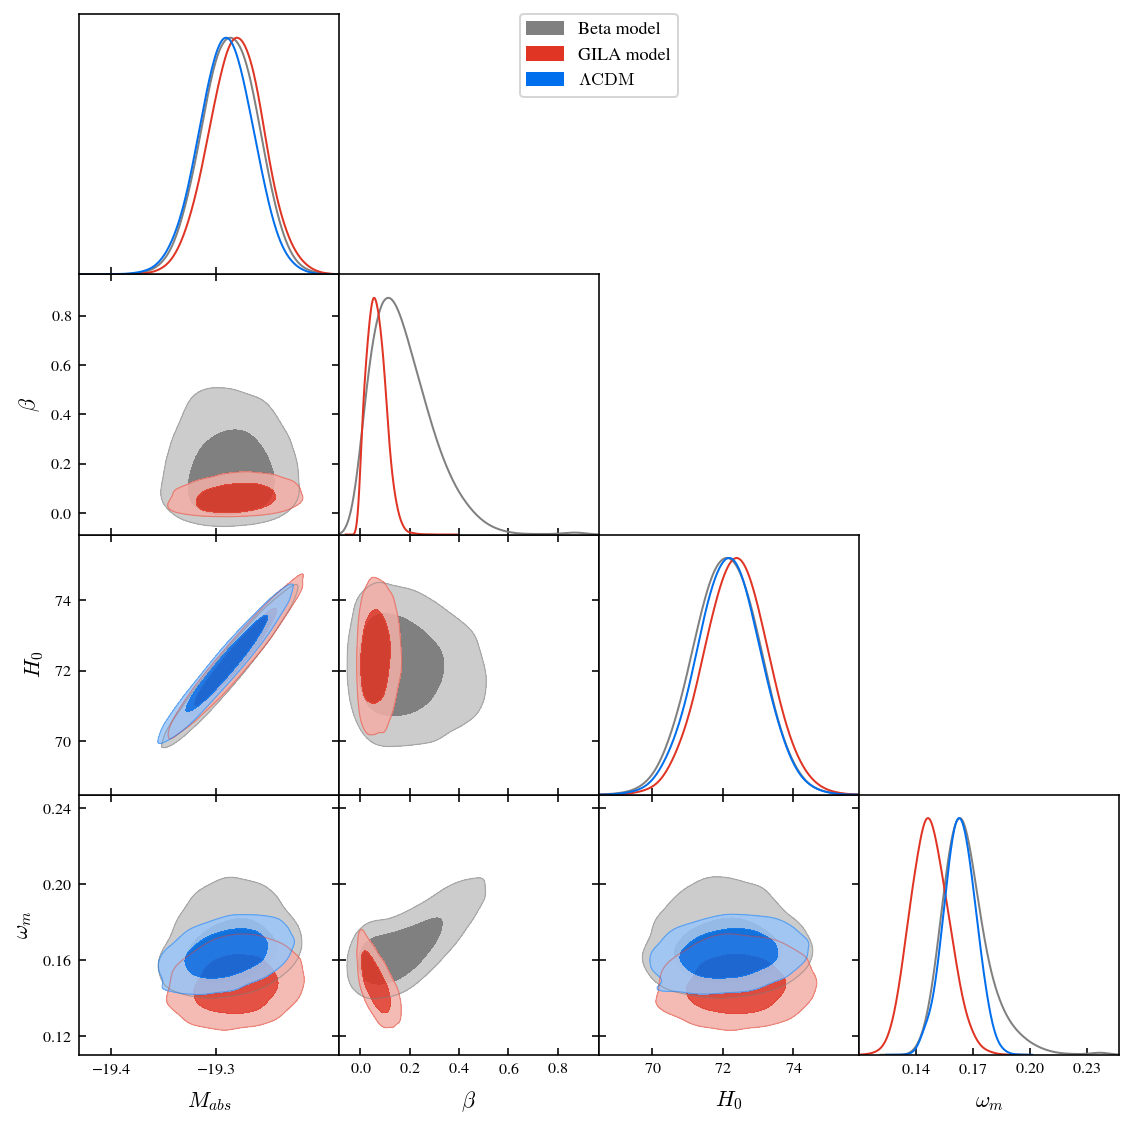

In [10]:
discard=0
thin=1
root_dic = '/home/matias/Documents/Repos/GILA-output/'

# Get the samples:
samples_lcdm = emcee.backends.HDFBackend(root_dic + 'LCDM/sample_LCDM_PPS_CC_3params/sample_LCDM_PPS_CC_3params.h5')
samples_beta = emcee.backends.HDFBackend(root_dic + 'L=0.90/beta_model/sample_BETA_PPS_CC_4params_long_prior/sample_BETA_PPS_CC_4params.h5')
samples_gila = emcee.backends.HDFBackend(root_dic + 'L=0.90/GILA_model/sample_GILA_PPS_CC_4params/sample_GILA_PPS_CC_4params.h5')

#nwalkers, ndim = reader_lcdm.shape #Number of walkers and parameters

flat_samples_beta = samples_beta.get_chain(discard=discard, flat=True, thin=thin)
flat_samples_gila = samples_gila.get_chain(discard=discard, flat=True, thin=thin)
flat_samples_lcdm = samples_lcdm.get_chain(discard=discard, flat=True, thin=thin)


names = ['M_{{abs}}','\\beta','H_0','\omega_m']
labels = names

names_lcdm = ['M_{{abs}}','H_0','\omega_m']
labels_lcdm = names_lcdm


samples1 = MCSamples(samples=flat_samples_beta, names=names, labels=names)
samples1 = samples1.copy(label=r'Lowest-order with $0.3\sigma$ smoothing',
			settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3,
			'smooth_scale_1D':0.3})

samples2 = MCSamples(samples=flat_samples_gila, names=names, labels=names)
samples2 = samples2.copy(label=r'Lowest-order with $0.3\sigma$ smoothing',
			settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3,
			'smooth_scale_1D':0.3})

samples3 = MCSamples(samples=flat_samples_lcdm, names=names_lcdm, labels=names_lcdm)
samples3 = samples3.copy(label=r'Lowest-order with $0.3\sigma$ smoothing',
			settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3,
			'smooth_scale_1D':0.3})


g = plots.get_subplot_plotter()
g.triangle_plot([samples1, samples2, samples3],
				filled=True, params=names,
				#contour_colors=color,
				contour_lws=1,
				legend_labels=['Beta model','GILA model',r'$\Lambda \rm{{CDM}}$'])

g.export(root_dic + 'triangle_plot_beta_gila_lcdm.png')


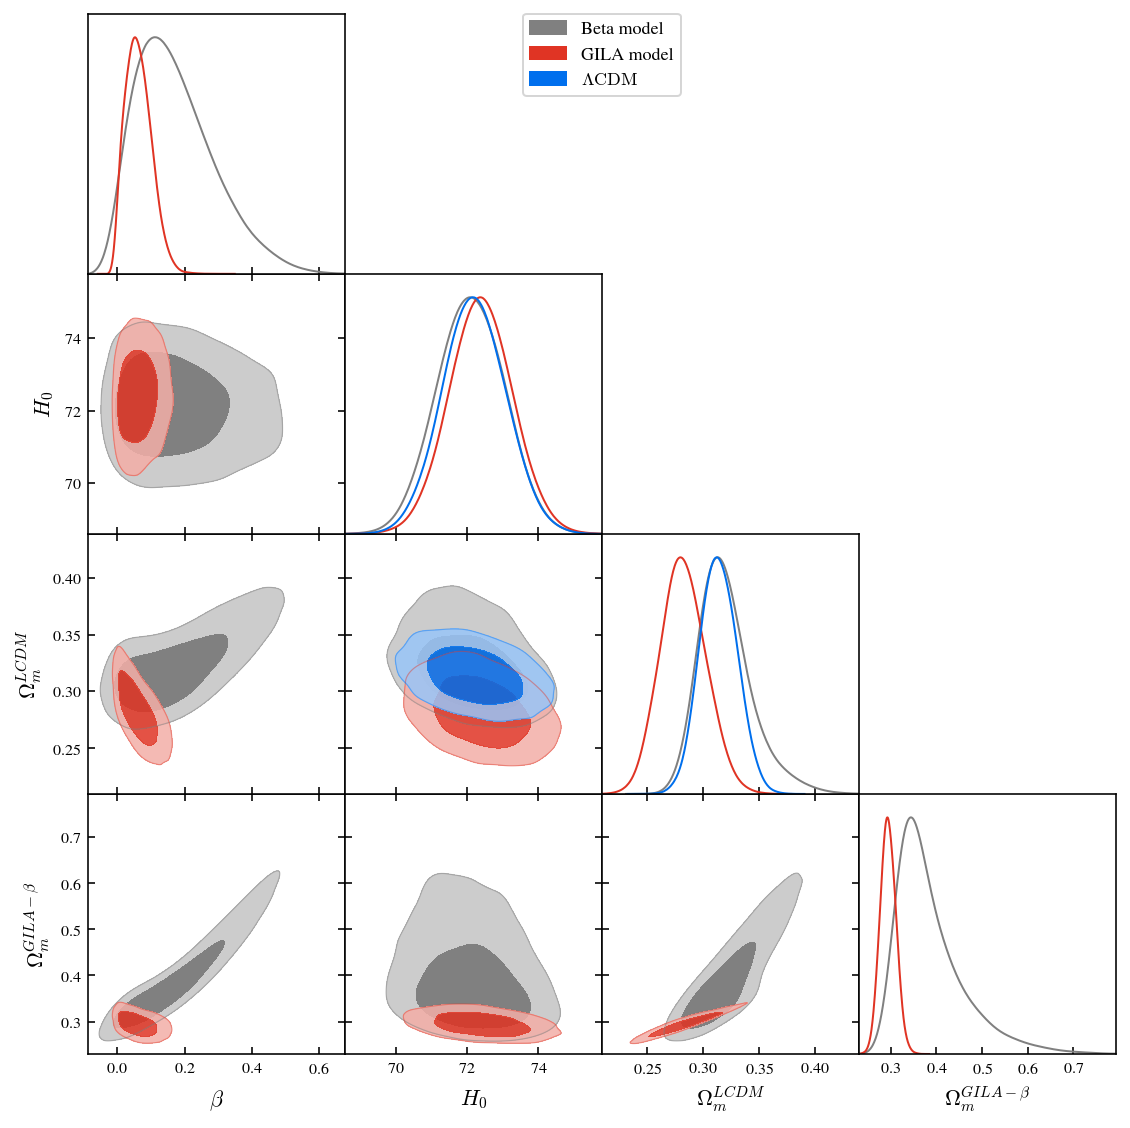

In [11]:
# Get the samples:
with np.load(root_dic + 'L=0.90/beta_model/sample_BETA_PPS_CC_4params_long_prior/sample_BETA_PPS_CC_4params' + '_deriv.npz') as data:
        flat_samples_beta_derived = data['new_samples']

with np.load(root_dic + 'L=0.90/GILA_model/sample_GILA_PPS_CC_4params/sample_GILA_PPS_CC_4params' + '_deriv.npz') as data:
        flat_samples_gila_derived = data['new_samples']

with np.load(root_dic + 'LCDM/sample_LCDM_PPS_CC_3params/sample_LCDM_PPS_CC_3params' + '_deriv.npz') as data:
        flat_samples_lcdm_derived = data['new_samples']


names_derived = ['\\beta', 'H_{0}', '\Omega_{{m}}^{{LCDM}}', '\Omega_{{m}}^{{GILA-\\beta}}']
labels_derived = names_derived

names_derived_lcdm = ['M_{{abs}}', 'H_{0}', '\Omega_{{m}}^{{LCDM}}']
labels_derived_lcdm = names_derived_lcdm


samples1 = MCSamples(samples=flat_samples_beta_derived, names=names_derived, labels=names_derived)
samples1 = samples1.copy(label=r'Lowest-order with $0.3\sigma$ smoothing',
			settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3,
			'smooth_scale_1D':0.3})

samples2 = MCSamples(samples=flat_samples_gila_derived, names=names_derived, labels=names_derived)
samples2 = samples2.copy(label=r'Lowest-order with $0.3\sigma$ smoothing',
			settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3,
			'smooth_scale_1D':0.3})

samples3 = MCSamples(samples=flat_samples_lcdm_derived, names=names_derived_lcdm, labels=names_derived_lcdm)
samples3 = samples3.copy(label=r'Lowest-order with $0.3\sigma$ smoothing',
			settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3,
			'smooth_scale_1D':0.3})

g = plots.get_subplot_plotter()
g.triangle_plot([samples1, samples2, samples3],
				filled=True, params=names_derived,
				#contour_colors=color,
				contour_lws=1,
				legend_labels=['Beta model','GILA model',r'$\Lambda \rm{{CDM}}$'])

g.export(root_dic + 'triangle_plot_beta_gila_lcdm_derived.png')


In [12]:
def report_intervals(sampler, labels, discard=0, thin=1):
    if isinstance(sampler, np.ndarray)==True: #Posprocessed chains
        samples = sampler
        len_chain, ndim=samples.shape
    else:
        samples = sampler.get_chain(discard=discard, flat=True, thin=thin)
        len_chain, nwalkers, ndim = sampler.get_chain().shape

    #textfile_witness = open(save_path + '/intervals.dat','w')
    labels = labels
    for i in range(ndim):
        mean = np.mean(samples[:,i])
        one_s = 68
        two_s = 95

        one_sigma = az.hdi(samples,hdi_prob = one_s/100)[i]
        two_sigma = az.hdi(samples,hdi_prob = two_s/100)[i]

        q1 = np.diff([one_sigma[0],mean,one_sigma[1]])
        q2 = np.diff([two_sigma[0],mean,two_sigma[1]])

        if np.abs(one_sigma[0]) < 10**(-2): #Upper limit interval
            txt = "\mathrm{{{0}}} < {1:.3f}({2:.3f})"
            txt = txt.format(labels[i], mean + q1[1], mean + q2[1])

        else:
            txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}({4:.3f})}}^{{+{2:.3f}({5:.3f})}}"
            txt = txt.format(mean, q1[0], q1[1], labels[i], q2[0], q2[1])
        #textfile_witness.write('{} \n'.format(txt))
        print(txt)

In [19]:
from IPython.display import display, Math
import arviz as az
from scipy.stats import scoreatpercentile
from getdist import plots, MCSamples

#BETA intervals
print('Beta model intervals:')
report_intervals(samples_beta, names)
report_intervals(flat_samples_beta_derived, names_derived)
print('\n')

#GILA intervals
print('GILA model intervals:')
report_intervals(samples_gila, names)
report_intervals(flat_samples_gila_derived, names_derived)
print('\n')

#LCDM intervals
print('LCDM model intervals:')
report_intervals(samples_lcdm, names_lcdm)
report_intervals(flat_samples_lcdm_derived, names_derived_lcdm)


Beta model intervals:
\mathrm{M_{{abs}}} = -19.286_{-0.025(0.050)}^{+0.027(0.050)}
\mathrm{\beta} = 0.177_{-0.161(0.177)}^{+0.053(0.225)}
\mathrm{H_0} = 72.107_{-0.898(1.783)}^{+0.927(1.778)}
\mathrm{\omega_m} = 0.167_{-0.014(0.022)}^{+0.007(0.026)}
\mathrm{\beta} = 0.173_{-0.156(0.173)}^{+0.056(0.217)}
\mathrm{H_{0}} = 72.111_{-0.913(1.788)}^{+0.920(1.745)}
\mathrm{\Omega_{{m}}^{{LCDM}}} = 0.320_{-0.026(0.042)}^{+0.016(0.051)}
\mathrm{\Omega_{{m}}^{{GILA-\beta}}} = 0.387_{-0.082(0.098)}^{+0.023(0.159)}


GILA model intervals:
\mathrm{M_{{abs}}} = -19.281_{-0.025(0.050)}^{+0.025(0.050)}
\mathrm{\beta} = 0.065_{-0.042(0.065)}^{+0.034(0.066)}
\mathrm{H_0} = 72.379_{-0.860(1.775)}^{+0.895(1.715)}
\mathrm{\omega_m} = 0.147_{-0.011(0.018)}^{+0.009(0.020)}
\mathrm{\beta} = 0.064_{-0.046(0.064)}^{+0.029(0.067)}
\mathrm{H_{0}} = 72.387_{-0.833(1.665)}^{+0.871(1.707)}
\mathrm{\Omega_{{m}}^{{LCDM}}} = 0.282_{-0.020(0.037)}^{+0.019(0.040)}
\mathrm{\Omega_{{m}}^{{GILA-\beta}}} = 0.294_{-0.017(0.03